# Stage 1

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf

In [ ]:
tickers = ['AMAT','NXPI']
df = yf.download(tickers,start='2020-01-01')['Close']
rolling_window = 21*12 #One year has roughly 252 trading days so this is a 1 year rolling window. Or, 21 days per month
stock1,stock2 = tickers

/tmp/ipython-input-119855505.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers,start='2020-01-01')['Close']
[*********************100%***********************]  2 of 2 completed


#Spread by Rishav Patel

#Why?
#Spread is an important feature because it will tell us the difference between the historical linear relationship (calculated using linear regression) and the current relationship. In essence it is the difference between stock1's actual value and stock2's predicted value using a a coefficient beta and a intercept alpha which were obtained through linear regression. We can use spread to find out when the two stocks are diverging, which is an opportunity for profit.

#How?
#Using a rolling window of 252, we grab 252 days of prices between two stocks, fit them to a line of best fit such that stock1 predicts stock2, and then calculate spread for this rolling window by subtracting the actual value of stock 2 from the value of (stock1*coefficient + intercept). We then repeat this process by grabbing a new rolling window except we shift the window by 1 (in a for loop). The loop continues until the rolling window is iterated all the way to the latest price and a rolling spread has been calculated for every day.

#Missing Values
#Because we are using a window of 252, we automatically lack the data necessary to begin generating rolling data for the first 251 days of the dataset. This data will be used for rolling spread of later days but the rolling spread for that data cannot be computed. Hence we remove these rows from our data.

#Code:
#Rolling alpha is the intercept for each window and rolling beta is the coefficient for each window, obtained by linear regression. We calculate it like so:


Missing values in spread:
 252

First 10 values of spread:
 Date
2020-12-31    -7.015273
2021-01-04    -4.988850
2021-01-05    -6.089313
2021-01-06    -5.151366
2021-01-07    -5.434408
2021-01-08    -6.845746
2021-01-11   -12.227255
2021-01-12   -12.447779
2021-01-13    -7.453762
2021-01-14   -17.383738
dtype: float64


<Axes: title={'center': 'Spread'}, xlabel='Date'>

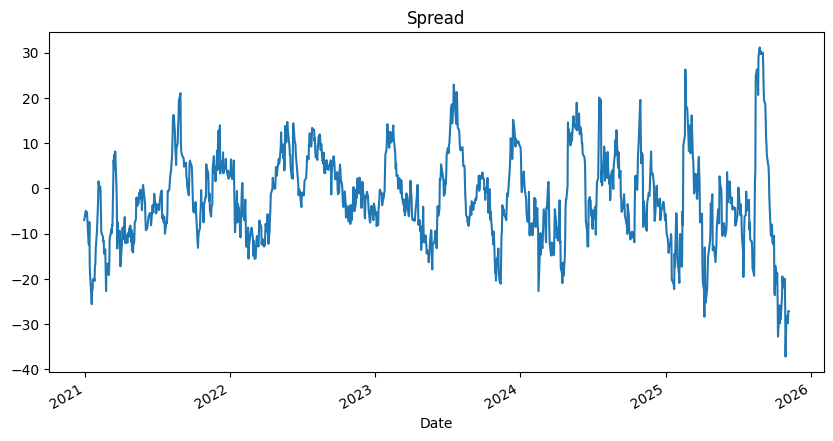

In [ ]:
rolling_alpha = [np.nan] * rolling_window
rolling_beta = [np.nan] * rolling_window
for i in range(rolling_window, len(df)):
    past_data = df.iloc[i-rolling_window:i]

    X = past_data[stock1].values
    y = past_data[stock2].values
    X = sm.add_constant(X)

    model = sm.OLS(y,X).fit()
    rolling_alpha.append(model.params[0])
    rolling_beta.append(model.params[1])
rolling_params = pd.DataFrame({'Rolling Alpha':rolling_alpha,'Rolling Beta':rolling_beta},index=df.index)

#Calculates the spread of the data.
spread = df[stock2] - (rolling_params['Rolling Alpha'] + rolling_params['Rolling Beta'] * df[stock1])

#Check to see how many missing values exist
print("\nMissing values in spread:\n",spread.isnull().sum())

#Check the first 10 valid values to ensure it runs
spread = spread.dropna()
print("\nFirst 10 values of spread:\n",spread.head(10))

#Plot for spread
spread.plot(title="Spread", figsize = (10,5))

#RollingMean by Jared Martinez

#Why?
I calculated the rolling mean of the spread between AMAT and NXPI. The rolling mean smooths out short-term noise in the spread and shows its underlying trend, helping investors see if the relationship is drifting or reverting. This insight can guide better timing and strategy decisions.

#How?  * use a sliding  window to computer the average sprea at each step  * Shift the window by 1 day at a time to generate a rollign sequence of mean values. * this provides a time seris of moving averages that track the central tendency of the spread

#Missing values the first window -1 rows cannot be comouted and are dropped because a rolling mean requires enough data equal to the window size

#Code


Missing values in spread:
 251

First 10 values of spread:
 Date
2021-12-30   -3.352646
2021-12-31   -3.313974
2022-01-03   -3.279874
2022-01-04   -3.230238
2022-01-05   -3.199233
2022-01-06   -3.168006
2022-01-07   -3.132625
2022-01-10   -3.069986
2022-01-11   -2.996080
2022-01-12   -2.963049
dtype: float64


<Axes: title={'center': 'Rolling mean'}, xlabel='Date'>

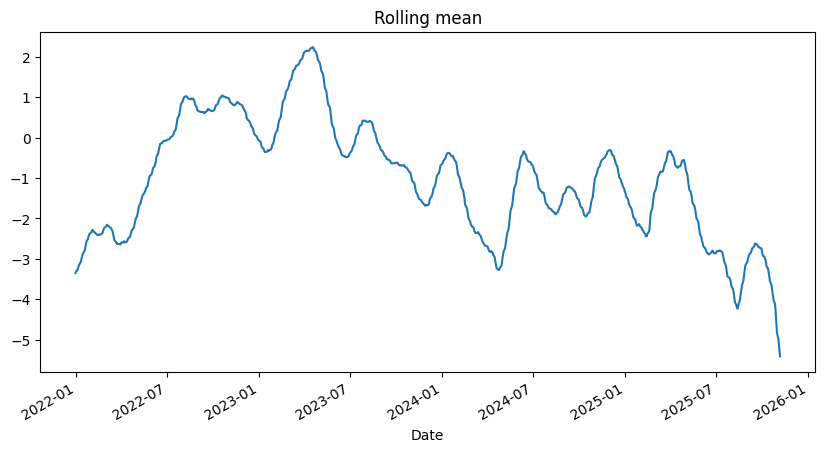

In [ ]:
rolling_mean = spread.rolling(rolling_window).mean()

#Check to see how many missing values exist
print("\nMissing values in spread:\n",rolling_mean.isnull().sum())

#Check the first 10 valid values to ensure it runs
rolling_mean = rolling_mean.dropna()
print("\nFirst 10 values of spread:\n",rolling_mean.head(10))

#Plot for spread
rolling_mean.plot(title="Rolling mean", figsize = (10,5))

#RollingSD by Angel Lopez

##Why?
#For my feature, I did the rolling standard deviation of the spread between AMAT and NXPI for stock finance
#Spread is the difference between NXPI's actual value and AMAT's predicted value. Rolling SD measures the fluctuation of the spread (how big the spread is aka volatility).
#Volatility is used to judge the risk of investing at any given point, helping investors determine when it's best to invest.

#How?
#Via the data, weuse a rolling windows of a year of trading (about 252 days).
#Rolling SD is calculated each day based on the past 252 days worth of spread data. The greater the value, the greater volatility

#Missing Values?
#Missing values are handled by setting the first 251 rows with NaN. In "ml_data = pd.DataFrame(){...}", rows with NaN are dropped. Upon hitting row 252, we have usable data. In practice, we just go to each row until 252, which would be our first and by that point only row with data, so we don't have 252 rows then, just 1.

#Code:


First 10 values of Rolling SD:
 Date
2020-12-31   NaN
2021-01-04   NaN
2021-01-05   NaN
2021-01-06   NaN
2021-01-07   NaN
2021-01-08   NaN
2021-01-11   NaN
2021-01-12   NaN
2021-01-13   NaN
2021-01-14   NaN
dtype: float64

Missing values in rolling_std:
 251


<Axes: title={'center': 'Rolling SD of Spread'}, xlabel='Date'>

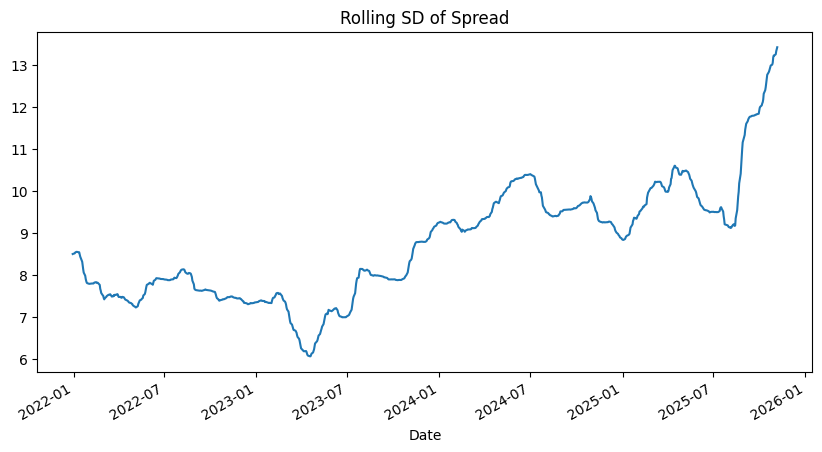

In [ ]:
#Calculates the Rolling SD of the data Spread
rolling_std = spread.rolling(rolling_window).std()

#Check the first 10 values to ensure it runs
print("\nFirst 10 values of Rolling SD:\n", rolling_std.head(10))

#Check to see how many missing values exist
print("\nMissing values in rolling_std:\n", rolling_std.isnull().sum())

#Plot for Rolling SD
rolling_std.plot(title="Rolling SD of Spread", figsize=(10,5))

#Sajid-Z-score

#Why? Z-score is an important feature because it tells us how many standard deviations the current spread is away from its historical mean. Unlike spread (absolute divergence) and rolling SD (volatility), z-score standardizes the spread, making it possible to compare deviations at different times on the same scale.

#Missing Values: Each rolling feature (Spread, Rolling SD, Z-Score) could introduce missing values in the first 251 rows because a full 252-day window is required. These rows are dropped from the dataset to ensure all features align and remain usable.

#How? We use the rolling mean and rolling standard deviation of the spread (over a 252-day window) to calculate z-score for each day. We calculate this for each day starting at index 252. Like spread and rolling SD, the first 251 rows will be missing values

#Z-score calculation


Missing values in z_score:
 251

First 10 values of z_score:
 Date
2021-12-30    0.746970
2021-12-31    0.710593
2022-01-03    0.808393
2022-01-04    1.130406
2022-01-05    0.686033
2022-01-06    0.655361
2022-01-07    0.608338
2022-01-10    0.775753
2022-01-11    1.073741
2022-01-12    0.448790
dtype: float64


<Axes: title={'center': 'Z-Score of Spread'}, xlabel='Date'>

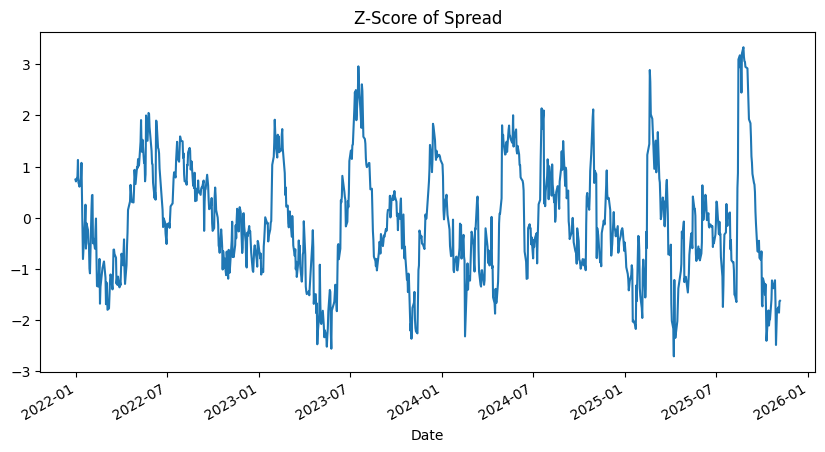

In [ ]:
z_score = (spread - rolling_mean) / rolling_std
#Check to see how many missing values exist
print("\nMissing values in z_score:\n", z_score.isnull().sum())
#Check the first 10 valid values to ensure it runs
z_score = z_score.dropna()
print("\nFirst 10 values of z_score:\n", z_score.head(10))
#Plot z-score
z_score.plot(title="Z-Score of Spread", figsize=(10,5))

In [ ]:
ml_data = pd.DataFrame({'spread':spread,
                        'rolling mean':rolling_mean,
                        'rolling std':rolling_std,
                        'z-score': z_score}, index = df.index)
ml_data = ml_data.dropna()

In [ ]:
ml_data

,spread,rolling mean,rolling std,z-score
Date,,,,
2021-12-30,2.996728,-3.352646,8.500171,0.746970
2021-12-31,2.730055,-3.313974,8.505608,0.710593
2022-01-03,3.604471,-3.279874,8.516086,0.808393
2022-01-04,6.418991,-3.230238,8.536075,1.130406
2022-01-05,2.661724,-3.199233,8.543256,0.686033
...,...,...,...,...
2025-10-31,-28.683563,-4.836019,13.215124,-1.804565
2025-11-03,-28.092561,-5.000318,13.245953,-1.743343
2025-11-04,-29.817774,-5.140656,13.320888,-1.852513


# Stage 2

## Task 1a

In [ ]:
import scipy.stats as stats
import pandas as pd

features = ['spread', 'rolling mean', 'rolling std']

stats_summary = {}

for feature in features:
    data = ml_data[feature]
    stats_summary[feature] = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Variance': data.var(),
        'Skewness': stats.skew(data),
        'Kurtosis': stats.kurtosis(data)  # Fisher: 0 = normal
    }

stats_df = pd.DataFrame(stats_summary).T
stats_df

,Mean,Median,Variance,Skewness,Kurtosis
spread,-1.808820,-2.468707,107.150187,0.122368,0.433218
rolling mean,-1.037598,-0.933289,2.167349,0.005369,-0.490860
rolling std,8.731927,8.793336,1.920152,0.636712,0.414956


## Task 1b

| Feature       | Type      | Continuous or Discrete |
|---------------|-----------|-------------------------|
| spread        | Numerical | Continuous              |
| rolling mean  | Numerical | Continuous              |
| rolling std   | Numerical | Continuous              |

All selected features are **numerical and continuous**. They can take any real value within a range rather than fixed integers, which makes them continuous variables. None of the selected variables are categorical.

## Task 2a

**Spread** feature was selected for Task 2a. Since the spread fluctuates around zero and takes both positive and negativ values, it behaves like a stationary, mean-reverting financlial series which is assumed to follow a **Nornal Distribution**

## Task 2b

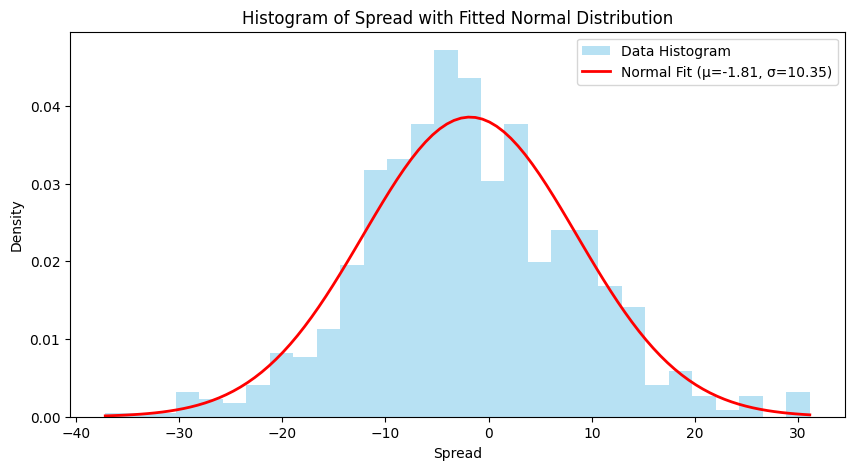

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = ml_data['spread']

# Fit a normal distribution
mu, sigma = norm.fit(data)

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data Histogram')

# Create x-axis for curve
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Plot fitted normal curve
plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})')

plt.title('Histogram of Spread with Fitted Normal Distribution')
plt.xlabel('Spread'); plt.ylabel('Density')
plt.legend()
plt.show()

The Histogram shows that the spread is roughly centered around zero, and the fitted Normal curve captures the central mass of the distribution resonably well.

## Task 3a

In [ ]:
# Population statistics
population_mean = data.mean()
population_variance = data.var()

print(f"Population Mean: {population_mean:.4f}")
print(f"Population Variance: {population_variance:.4f}")

sample_1 = data.sample(100, random_state=1)

sample_mean_1 = sample_1.mean()
sample_variance_1 = sample_1.var()

print("\n--- Sample 1 (100 samples) ---")
print(f"Sample Mean: {sample_mean_1:.4f}")
print(f"Sample Variance: {sample_variance_1:.4f}")

Population Mean: -1.8088
Population Variance: 107.1502

--- Sample 1 (100 samples) ---
Sample Mean: -1.8306
Sample Variance: 77.3803


## Task 3b

In [ ]:
# Repeat sampling 3 times with different seeds
sample_means = []
sample_variances = []

for i in range(3):
    sample = data.sample(100, random_state=i+1)
    sample_means.append(sample.mean())
    sample_variances.append(sample.var())
    print(f"\n--- Sample {i+1} ---")
    print(f"Sample Mean: {sample.mean():.4f}")
    print(f"Sample Variance: {sample.var():.4f}")


--- Sample 1 ---
Sample Mean: -1.8954
Sample Variance: 78.2581

--- Sample 2 ---
Sample Mean: -2.3957
Sample Variance: 117.4530

--- Sample 3 ---
Sample Mean: -2.3503
Sample Variance: 120.3643


These values are all close to the population mean but they do vary slightly due to randomness  similarly the sample variance varies between "97.0164" and "115.7306" Even though the samples differ they remian centered around the true population values

## Task 4

Correlation Matrix:
                spread  rolling mean  rolling std
spread        1.000000      0.188573    -0.131777
rolling mean  0.188573      1.000000    -0.634067
rolling std  -0.131777     -0.634067     1.000000


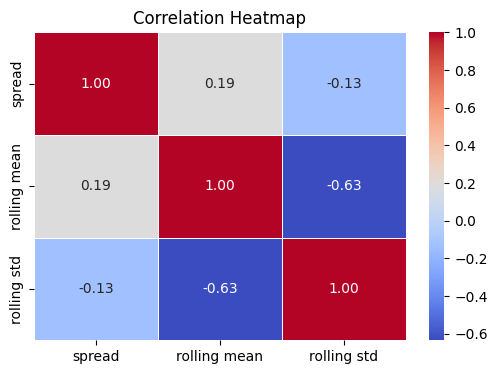

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for correlation
corr_data = ml_data[['spread', 'rolling mean', 'rolling std']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows that spread and rolling mean have a very weak positive correlation of .09. Spread and Rolling standard deviation have an even weaker psotive correlation of .03 suggesting almost no lineary relationship. the strongest relationship is Rolling mean and standard deviation.


In [ ]:
### Task 5
# Creating some Hypotheses

# Based on the work done in tasks 1 through 4, we have come up with the following hypotheses:

# 1) Periods with higher Rolling SD will have higher mean absolute Z-Score values
  #  - Z-score values are expected to increase when the Rolling SD coincides with larger mean deviations
  #  - How we may test: we can compute the correlation

# 2) Absolute Rolling Mean is positively correlated with Rolling SD
#    - Volatility increases with an increasing mean magnitude
#    - How we may test: Correlation analysis between the Rolling Mean and Rolling SD

# 3) Spread is positively correlated with Rolling SD
#    - Higher volatility implies higher spread, which in turn creates more uncertainity in the data
#    - How we may test: Correlation between Spread and Rolling SD should give a solid result

**Task 5** - Creating some Hypotheses

Based on the work done in tasks 1 through 4, we have come up with the following hypotheses:

**1) Periods with higher Rolling SD will have higher mean absolute Z-Score values**
- Z-Scores are expected to increase when the Rolling SD coincides with larger mean deviations

How we may test: we can compute the correlation

**2) Absolute Rolling Mean is positively correlated with Rolling SD**
- Volatility increases with an increasing mean magnitude

How we may test: Correlation analysis between the Rolling Mean and Rolling SD

**3) Spread is positively correlated with Rolling SD**
- Higher volatility implies higher spread, which in turn creates more uncertainity in the data

How we may test: Correlation between Spread and Rolling SD should give a solid result

Hypothesis 2: Absolute Rolling Mean is positively correlated with Rolling SD
[H2] Pearson r=0.413, p=0.00000 → Reject H0
[H2] Spearman ρ=0.319, p=0.00000

Hypothesis 3: Spread is positively correlated with Rolling SD
[H3] Pearson r=-0.146, p=0.00000 → Fail to reject H0
[H3] Spearman ρ=-0.058, p=0.07064


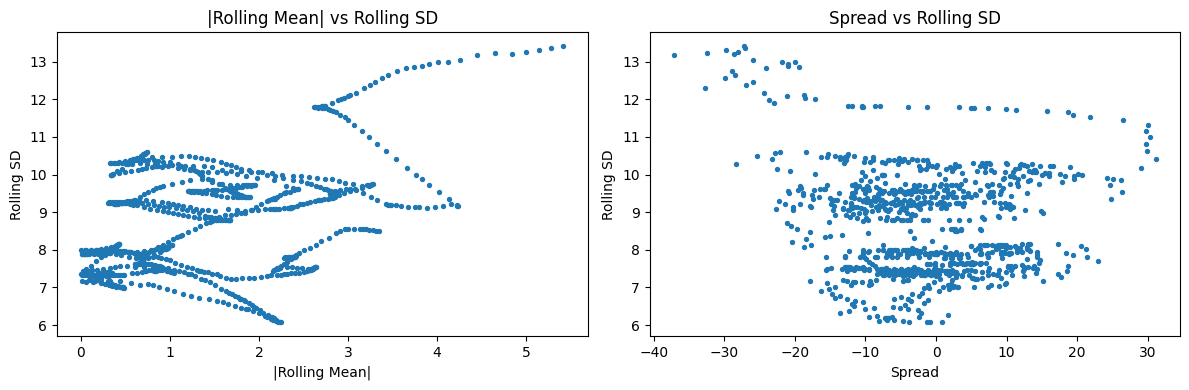

In [ ]:
# Stage 3

from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


# Safety check for ml data, run previous stages if not 'active'
assert 'ml_data' in globals(), "ml_data not found. Re-run Stage 2 to build ml_data."
ml_data = ml_data[['spread', 'rolling mean', 'rolling std', 'z-score']].dropna().copy()

# Task 1

# Set up var for future task 1c testng
alpha = 0.05
spr  = ml_data['spread']
rmean = ml_data['rolling mean']
rsd  = ml_data['rolling std']
rm_abs = rmean.abs()

# 1a) Write Hypotheses Explicitly
# Hypothesis 2: Absolute Rolling Mean is positively correlated with Rolling Standard Deviation
# - H0: ρ(|Rolling Mean|, Rolling SD) = 0  (no relationship)
# - H1: ρ(|Rolling Mean|, Rolling SD) > 0  (positive relationship)

# Hypothesis 3: Spread is positively correlated with Rolling Standard Deviation
#   H0: ρ(Spread, Rolling SD) = 0
#   H1: ρ(Spread, Rolling SD) > 0


# 1b) Choose & Justify appropriate tests
# Both pairs are continuous
# - Rolling Mean & Rolling SD from Hypothesis 2
# - Spread & Rolling SD
# Thus, we can use the following correlation tests:
# - Pearson r let's us test and see if there is a linear association between the pairs
# - Spearman ρ to check if they're generally monotonic (non-linear) relations


# 1c) Run our tests, report statistics & p-value, and make a decision
# decision() checks to see if we reject the null hypothesis
def decision(r, p, alpha=0.05):
    return "Reject H0" if (p < alpha and r > 0) else "Fail to reject H0"

# Hypothesis 2
r_h2, p_h2 = pearsonr(rm_abs, rsd)
r_h2_s, p_h2_s = spearmanr(rm_abs, rsd)
print("Hypothesis 2: Absolute Rolling Mean is positively correlated with Rolling SD")
print(f"[H2] Pearson r={r_h2:.3f}, p={p_h2:.5f} → {decision(r_h2,p_h2)}")
print(f"[H2] Spearman ρ={r_h2_s:.3f}, p={p_h2_s:.5f}")

# Hypothesis 3
r_h3, p_h3 = pearsonr(spr, rsd)
r_h3_s, p_h3_s = spearmanr(spr, rsd)
print("\nHypothesis 3: Spread is positively correlated with Rolling SD")
print(f"[H3] Pearson r={r_h3:.3f}, p={p_h3:.5f} → {decision(r_h3,p_h3)}")
print(f"[H3] Spearman ρ={r_h3_s:.3f}, p={p_h3_s:.5f}")

# Optional plots for Task 1 result visualization
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].scatter(rm_abs, rsd, s=8)
axes[0].set_title("|Rolling Mean| vs Rolling SD"); axes[0].set_xlabel("|Rolling Mean|"); axes[0].set_ylabel("Rolling SD")
axes[1].scatter(spr, rsd, s=8)
axes[1].set_title("Spread vs Rolling SD"); axes[1].set_xlabel("Spread"); axes[1].set_ylabel("Rolling SD")
plt.tight_layout(); plt.show()

In [ ]:
# Task 2

# 2a) Identify target Var & make 80/20 train test splits for each feature

# 80/20 Split for baseline model (Spread)
# Predict Spread from Rolling Mean & Rolling SD
X_spread = ml_data[['rolling mean', 'rolling std']]
y_spread = ml_data['spread']
# Perform the 80/20 split in train testing
Xsp_train, Xsp_test, ysp_train, ysp_test = train_test_split(X_spread, y_spread, test_size=0.20, random_state=42)
# Print results
print("\n[2a] Baseline regression problem:")
print(f"  Target: Spread; Features: ['rolling mean','rolling std']")
print(f"  Train size: {Xsp_train.shape}, Test size: {Xsp_test.shape}")

# 80/20 Split for Rolling SD
# Predict Rolling SD using log to handle skew
# Add some simple lags to give the model temporal context
df_vol = ml_data.copy()
for lag in [1,5,21]:
    df_vol[f'spread_lag{lag}']      = df_vol['spread'].shift(lag)
    df_vol[f'rmean_lag{lag}']       = df_vol['rolling mean'].shift(lag)
    df_vol[f'rsd_lag{lag}']         = df_vol['rolling std'].shift(lag)
df_vol = df_vol.dropna()
# Identify targets and features for 2d
# Inputs for volatility model: lags only (you can add contemporaneous features if permitted)
X_vol = df_vol[[c for c in df_vol.columns if c.startswith(('spread_lag','rmean_lag','rsd_lag'))]]
# Target: log(rolling std + eps)
eps = 1e-8
y_vol = np.log(df_vol['rolling std'] + eps)
# 80/20 splits for train testing Volatility
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vol, y_vol, test_size=0.20, random_state=42)
# Print results
print("\n[2a] Rolling SD regression problem:")
print(f"  Target: log(Rolling SD); Features: {list(X_vol.columns)[:6]} ... (+{len(X_vol.columns)-6} more)" if len(X_vol.columns)>6 else f"  Target: log(Rolling SD); Features: {list(X_vol.columns)}")
print(f"  Train size: {Xv_train.shape}, Test size: {Xv_test.shape}")


# Reuse lagged-frame pattern to avoid any leakage
df_rmz = df_vol.copy()

# 80/20 Split for Rolling Mean
X_rm = df_rmz[[c for c in df_rmz.columns if c.startswith(('spread_lag','rmean_lag','rsd_lag'))]]
y_rm = df_rmz['rolling mean']
Xrm_train, Xrm_test, yrm_train, yrm_test = train_test_split(
    X_rm, y_rm, test_size=0.20, random_state=42
)
# Print Results
print("\n[2a] Rolling Mean regression problem:")
print(f"  Target: Rolling Mean; Features: {list(X_rm.columns)[:6]} ... (+{len(X_rm.columns)-6} more)"
      if len(X_rm.columns)>6 else
      f"  Target: Rolling Mean; Features: {list(X_rm.columns)}")
print(f"  Train size: {Xrm_train.shape}, Test size: {Xrm_test.shape}")

# 80/20 Split for Z-Score
# No log transformations since Z-Score is standardized already
X_z = df_rmz[[c for c in df_rmz.columns if c.startswith(('spread_lag','rmean_lag','rsd_lag'))]]
y_z = df_rmz['z-score']
# 80/20 Splits
Xz_train, Xz_test, yz_train, yz_test = train_test_split(
    X_z, y_z, test_size=0.20, random_state=42
)
# Print results
print("\n[2a] Z-Score regression problem:")
print(f"  Target: Z-Score; Features: {list(X_z.columns)[:6]} ... (+{len(X_z.columns)-6} more)"
      if len(X_z.columns)>6 else
      f"  Target: Z-Score; Features: {list(X_z.columns)}")
print(f"  Train size: {Xz_train.shape}, Test size: {Xz_test.shape}")


[2a] Baseline regression problem:
  Target: Spread; Features: ['rolling mean','rolling std']
  Train size: (774, 2), Test size: (194, 2)

[2a] Rolling SD regression problem:
  Target: log(Rolling SD); Features: ['spread_lag1', 'rmean_lag1', 'rsd_lag1', 'spread_lag5', 'rmean_lag5', 'rsd_lag5'] ... (+3 more)
  Train size: (757, 9), Test size: (190, 9)

[2a] Rolling Mean regression problem:
  Target: Rolling Mean; Features: ['spread_lag1', 'rmean_lag1', 'rsd_lag1', 'spread_lag5', 'rmean_lag5', 'rsd_lag5'] ... (+3 more)
  Train size: (757, 9), Test size: (190, 9)

[2a] Z-Score regression problem:
  Target: Z-Score; Features: ['spread_lag1', 'rmean_lag1', 'rsd_lag1', 'spread_lag5', 'rmean_lag5', 'rsd_lag5'] ... (+3 more)
  Train size: (757, 9), Test size: (190, 9)



[2b] Approx. feature influence for Spread (Linear coeffs):
rolling mean    1.252348
rolling std    -0.484727
dtype: float64


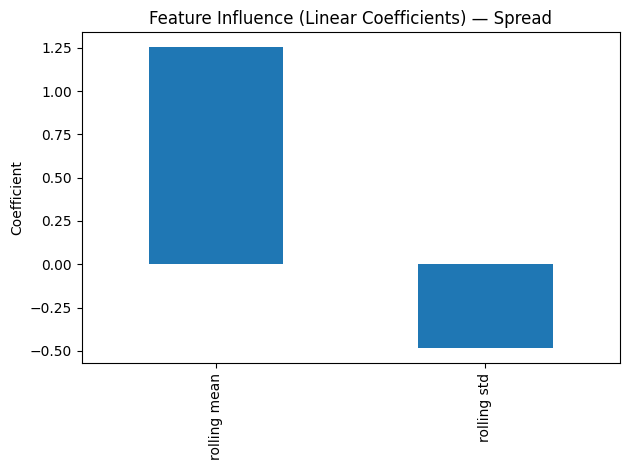

In [ ]:
# 2b) Feature importance / contribution preview

# LR Model to compute a coefficient, shows the influence on our target
lin_ref = LinearRegression().fit(Xsp_train, ysp_train)

# Sorts coefficients via absolute magnitude, helps us se which have the greatest effect
coef_series = pd.Series(lin_ref.coef_, index=X_spread.columns).sort_values(key=np.abs, ascending=False)

# Print ordered coefficients from coef_series
print("\n[2b] Approx. feature influence for Spread (Linear coeffs):")
print(coef_series)

# Make a bar chart to show each feature's coefficients
coef_series.plot(kind='bar', title='Feature Influence (Linear Coefficients) — Spread')
plt.ylabel("Coefficient"); plt.tight_layout(); plt.show()


[2c] Baseline — Polynomial Regression on Spread (degrees = 1,2,3,5)
  Degree 1: R²=0.0052, RMSE=10.259491
  Degree 2: R²=0.1631, RMSE=9.410155
  Degree 3: R²=0.1823, RMSE=9.301234
  Degree 5: R²=0.4528, RMSE=7.608664
  → Best degree: 5


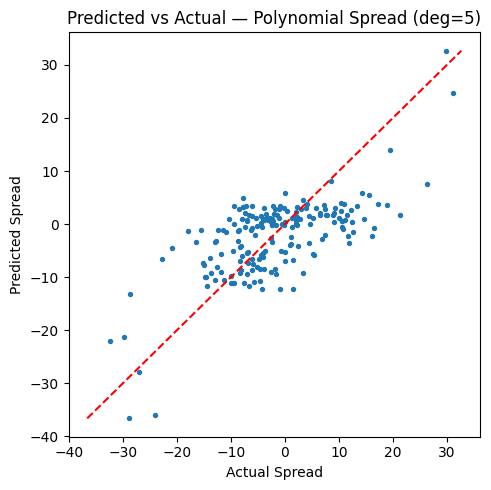


[2d] Angel's Model — Ridge Regression on log(Rolling SD) with degree-2 poly + scaling
  Ridge (deg=2): R²=0.9997, RMSE=0.002878

[2d] Rishav's Model — Random Forest on Spread
  Random Forest: R²=0.7041, RMSE=5.595445

[2d] Jared's Model — SVR on Rolling Mean
  SVR: R²=0.9993, RMSE=0.043133

[2d] Sajid's Model — KNN on Z-Score
  KNN: R²=0.8846, RMSE=0.407931

[2e] Model Comparison
     Member                                    Model        R2      RMSE
0  Baseline  Polynomial Regression on Spread (deg=5)  0.452849  7.608664
1     Angel                       Ridge (Rolling SD)  0.999724  0.002878
2    Rishav                    RandomForest (Spread)  0.704090  5.595445
3     Jared                       SVR (Rolling Mean)  0.999261  0.043133
4     Sajid                            KNN (Z-Score)  0.884563  0.407931


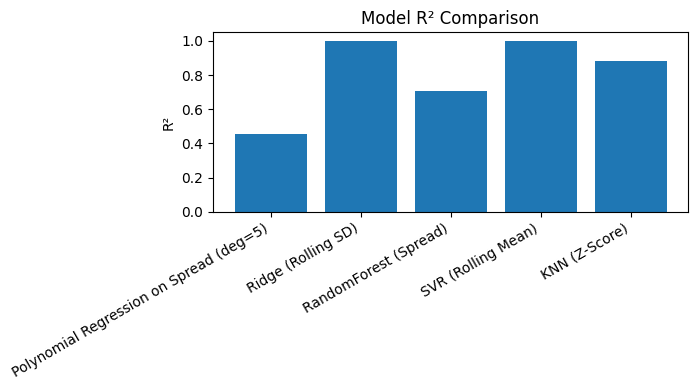


Current Top Model: Ridge (Rolling SD) (R²=0.9997, RMSE=0.002878)


In [ ]:
# 2c) Baseline model: Polynomial Regression on Spread
print("\n[2c] Baseline — Polynomial Regression on Spread (degrees = 1,2,3,5)")
poly_results = []

for d in [1,2,3,5]:
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('lr', LinearRegression())
    ])
    pipe.fit(Xsp_train, ysp_train)
    preds = pipe.predict(Xsp_test)
    r2   = r2_score(ysp_test, preds)
    rmse = np.sqrt(mean_squared_error(ysp_test, preds))
    poly_results.append({"Degree": d, "R2": r2, "RMSE": rmse})
    print(f"  Degree {d}: R²={r2:.4f}, RMSE={rmse:.6f}")

poly_df = pd.DataFrame(poly_results)
best_poly_row = poly_df.sort_values('R2', ascending=False).iloc[0]
best_deg = int(best_poly_row['Degree'])
print(f"  → Best degree: {best_deg}")

# Plot the predicted vs actual for best polynomial
best_poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_deg)),
    ('lr', LinearRegression())
]).fit(Xsp_train, ysp_train)
ysp_pred = best_poly_pipe.predict(Xsp_test)

plt.figure(figsize=(5,5))
plt.scatter(ysp_test, ysp_pred, s=8)
lims = [min(ysp_test.min(), ysp_pred.min()), max(ysp_test.max(), ysp_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Spread"); plt.ylabel("Predicted Spread")
plt.title(f"Predicted vs Actual — Polynomial Spread (deg={best_deg})")
plt.tight_layout(); plt.show()


# 2d) Additional Models for Spread, Rolling Mean, Rolling SD, Z-Score

# For table comparison stuff in 2e
results_rows = []

# Ridge Regression for log(Rolling SD) with Polynomial Degrees = 2 Features + Scaling
print("\n[2d] Angel's Model — Ridge Regression on log(Rolling SD) with degree-2 poly + scaling")

ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),  # sparse-friendly after poly
    ('ridge', RidgeCV(alphas=np.logspace(-4, 4, 25), cv=5))
])
ridge_pipe.fit(Xv_train, yv_train)
yv_pred = ridge_pipe.predict(Xv_test)
r2_v   = r2_score(yv_test, yv_pred)
rmse_v = np.sqrt(mean_squared_error(yv_test, yv_pred))
print(f"  Ridge (deg=2): R²={r2_v:.4f}, RMSE={rmse_v:.6f}")

# Rishave: Random Forest for Spread (uses Xsp_*)
print("\n[2d] Rishav's Model — Random Forest on Spread")
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, random_state=42)
rf.fit(Xsp_train, ysp_train)
rf_pred = rf.predict(Xsp_test)

# Compute metrics
r2_rf = r2_score(ysp_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(ysp_test, rf_pred))

# Print results
print(f"  Random Forest: R²={r2_rf:.4f}, RMSE={rmse_rf:.6f}")


# Jared: SVR for Rolling Mean (uses Xrm_*)
print("\n[2d] Jared's Model — SVR on Rolling Mean")
from sklearn.svm import SVR
jared = Pipeline([('scaler', StandardScaler()), ('svr', SVR(C=10, epsilon=0.01))])
jared.fit(Xrm_train, yrm_train)
jared_pred = jared.predict(Xrm_test)

# Compute metrics
r2_svr = r2_score(yrm_test, jared_pred)
rmse_svr = np.sqrt(mean_squared_error(yrm_test, jared_pred))

# Print results
print(f"  SVR: R²={r2_svr:.4f}, RMSE={rmse_svr:.6f}")


# Sajid — KNN for Z-Score (uses Xz_*)
print("\n[2d] Sajid's Model — KNN on Z-Score")
from sklearn.neighbors import KNeighborsRegressor
sajid = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=11, weights='distance'))])
sajid.fit(Xz_train, yz_train)
sajid_pred = sajid.predict(Xz_test)

# Compute metrics
r2_knn = r2_score(yz_test, sajid_pred)
rmse_knn = np.sqrt(mean_squared_error(yz_test, sajid_pred))

# Print results
print(f"  KNN: R²={r2_knn:.4f}, RMSE={rmse_knn:.6f}")


# 2e) Comparison table & Winner
# Add the baseline best polynomial (Spread) as a row
results_rows.append({
    "Member": "Baseline",
    "Model": f"Polynomial Regression on Spread (deg={best_deg})",
    "R2": float(best_poly_row['R2']),
    "RMSE": float(best_poly_row['RMSE'])
})

# Store additional model rows here
results_rows.append({
    "Member": "Angel",
    "Model": "Ridge (Rolling SD)",
    "R2": r2_v,
    "RMSE": rmse_v
})

results_rows.append({
    "Member":"Rishav",
    "Model":"RandomForest (Spread)",
    "R2": r2_score(ysp_test, rf_pred),
    "RMSE": np.sqrt(mean_squared_error(ysp_test, rf_pred))
    })

results_rows.append({
    "Member":"Jared",
    "Model":"SVR (Rolling Mean)",
    "R2": r2_score(yrm_test, jared_pred),
    "RMSE": np.sqrt(mean_squared_error(yrm_test, jared_pred))
    })

results_rows.append({
    "Member":"Sajid",
    "Model":"KNN (Z-Score)",
    "R2": r2_score(yz_test, sajid_pred),
    "RMSE": np.sqrt(mean_squared_error(yz_test, sajid_pred))
    })


# Build the table and show it
results_df = pd.DataFrame(results_rows)
print("\n[2e] Model Comparison")
print(results_df)

# Bar plot for models that have R2
plot_df = results_df.dropna(subset=['R2'])
plt.figure(figsize=(7,4))
plt.bar(plot_df['Model'], plot_df['R2'])
plt.xticks(rotation=30, ha='right');
plt.ylabel("R²");
plt.title("Model R² Comparison")
plt.tight_layout();
plt.show()

# Pick a winner among filled rows
# - Pretty sure it needs all additional models to work properly
if not plot_df.empty:
    winner = plot_df.sort_values('R2', ascending=False).iloc[0]
    print(f"\nCurrent Top Model: {winner['Model']} (R²={winner['R2']:.4f}, RMSE={winner['RMSE']:.6f})")
